In [ ]:
'''GOAL
TRYING TO CHECK WHEN A VIDEO WAS UPLOADED AND COMPARE IT TO IT'S START TRENDING DATE'''

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataframe.csv')
df_all_timestamps = pd.read_csv('dataframe_all_timestamps.csv')

In [3]:
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [4]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)

#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [5]:
df_all_timestamps.loc[:,'newtrending_date'] = \
                pd.to_datetime(df_all_timestamps['trending_date'],
                                infer_datetime_format=True,
                                errors='coerce')

In [48]:
# Remaking df_all_timestamps with less columns

small_view_all = df_all_timestamps[["video_id", "views", "country", "newtrending_date", "publish_timestamp"]]
# small_view_all.head()

In [49]:
# Remaking df_all_timestamps with less columns

US_bool_all = df_all_timestamps.country == 'US'

US_trending_all= small_view_all.loc[US_bool_all]
US_trending_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40379 entries, 372 to 356349
Data columns (total 5 columns):
video_id             40379 non-null object
views                40379 non-null int64
country              40379 non-null object
newtrending_date     40379 non-null datetime64[ns]
publish_timestamp    40379 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 1.8+ MB


In [50]:
# FROM SEAN

US_trending_all.loc[:,'publish_datetime'] = US_trending_all.loc[:,'publish_timestamp'].apply(lambda x: x.to_pydatetime())
US_trending_all.loc[:,'trending_datetime'] = US_trending_all.loc[:,'newtrending_date'].apply(lambda x: x.to_pydatetime())

US_trending_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40379 entries, 372 to 356349
Data columns (total 7 columns):
video_id             40379 non-null object
views                40379 non-null int64
country              40379 non-null object
newtrending_date     40379 non-null datetime64[ns]
publish_timestamp    40379 non-null datetime64[ns]
publish_datetime     40379 non-null datetime64[ns]
trending_datetime    40379 non-null datetime64[ns]
dtypes: datetime64[ns](4), int64(1), object(2)
memory usage: 2.5+ MB


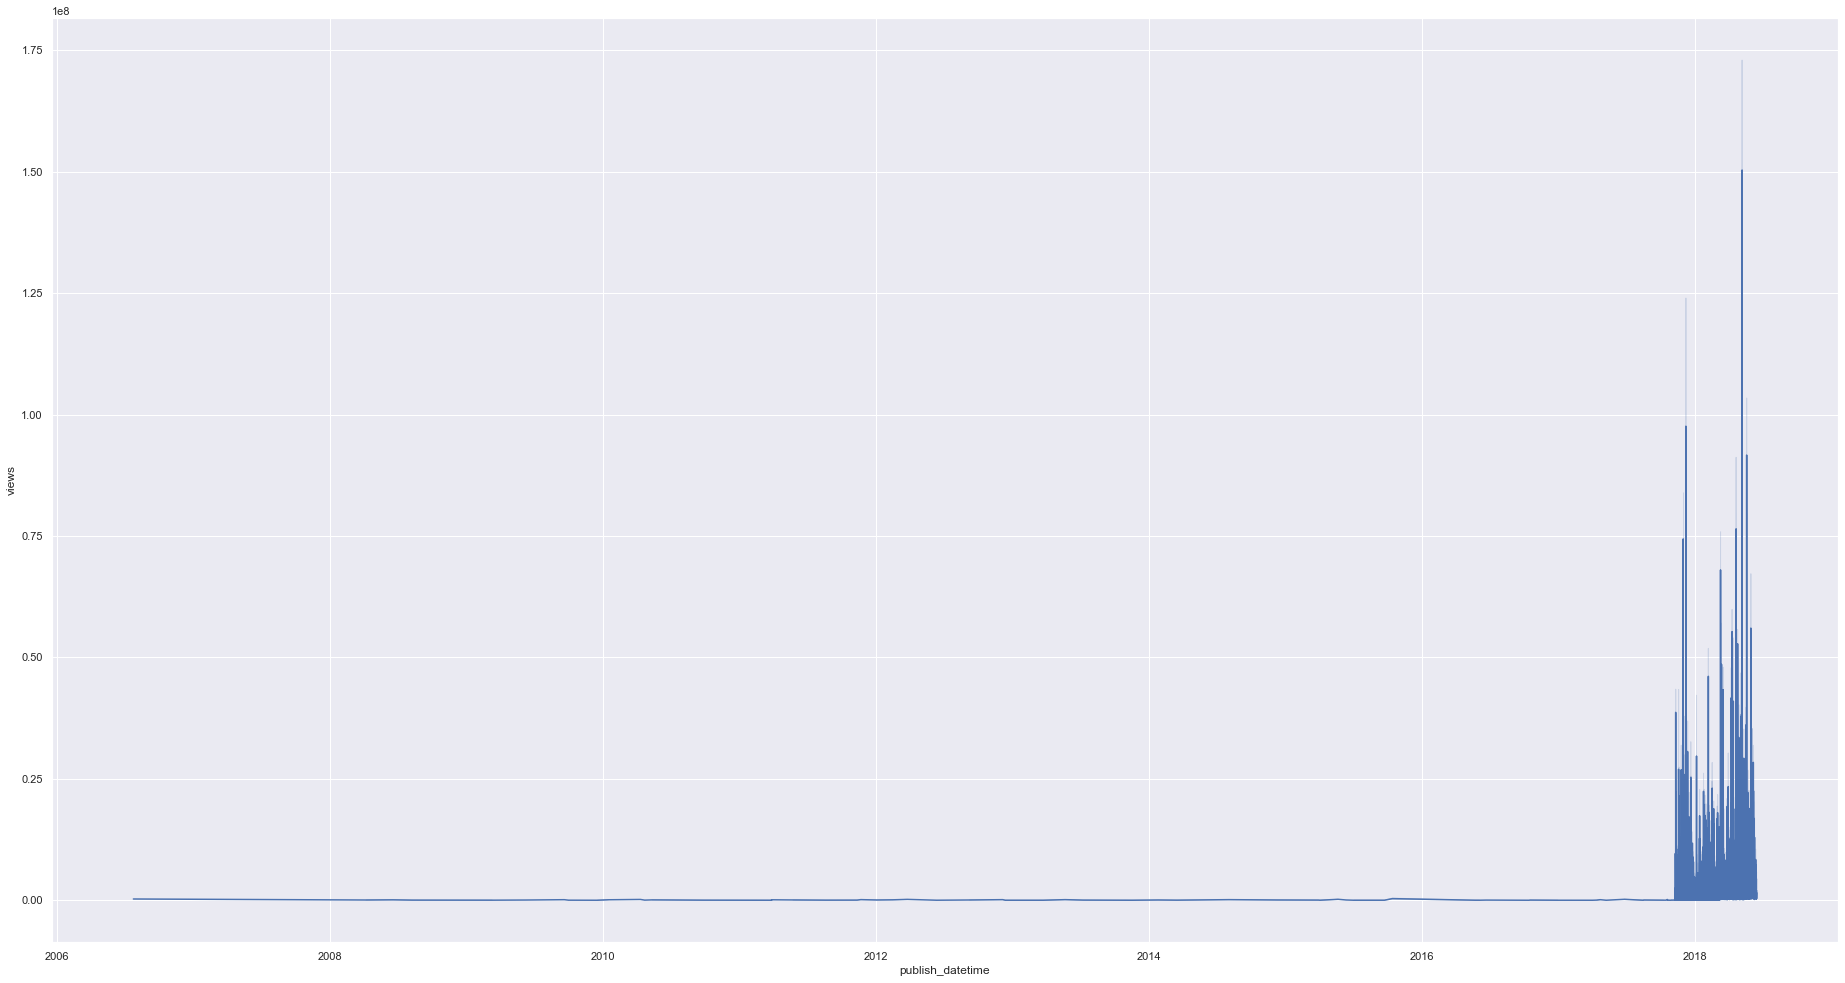

In [30]:
sns.set(rc={'figure.figsize':(32,17)})
sns.lineplot(x='publish_datetime', y='views', data=US_trending_all)

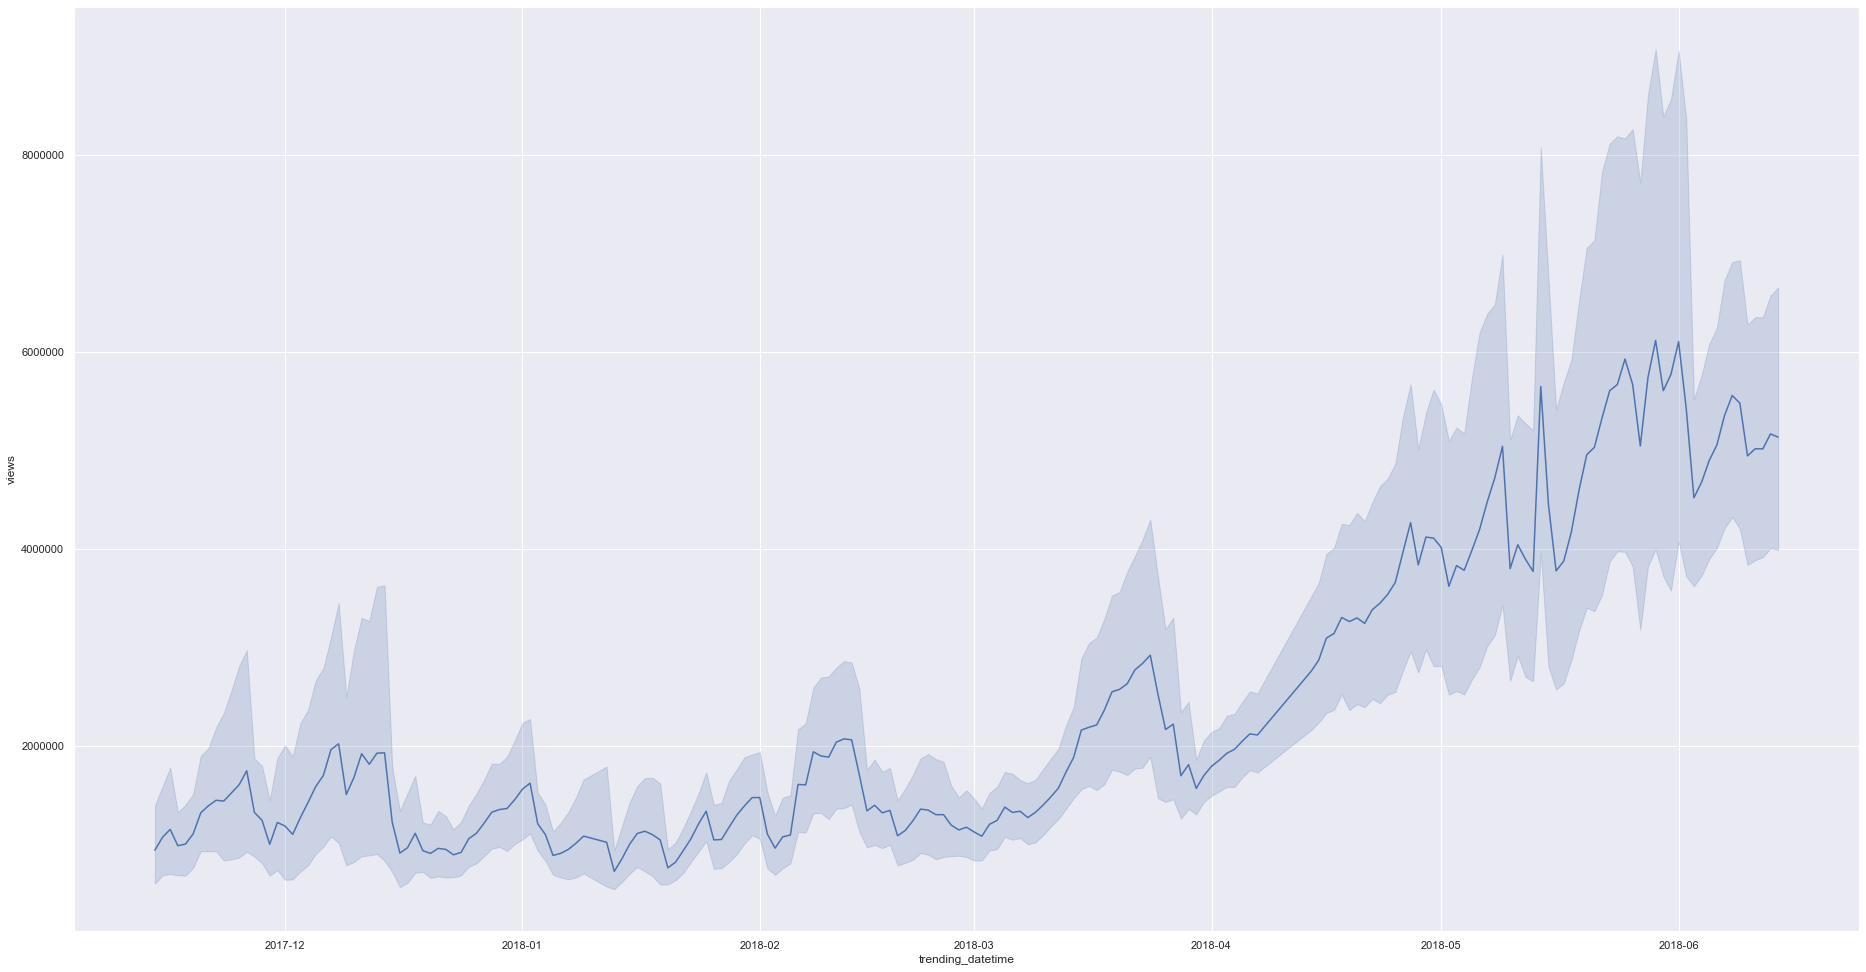

In [29]:
sns.set(rc={'figure.figsize':(32,17)})
sns.lineplot(x="trending_datetime", y="views", data=US_trending_all)

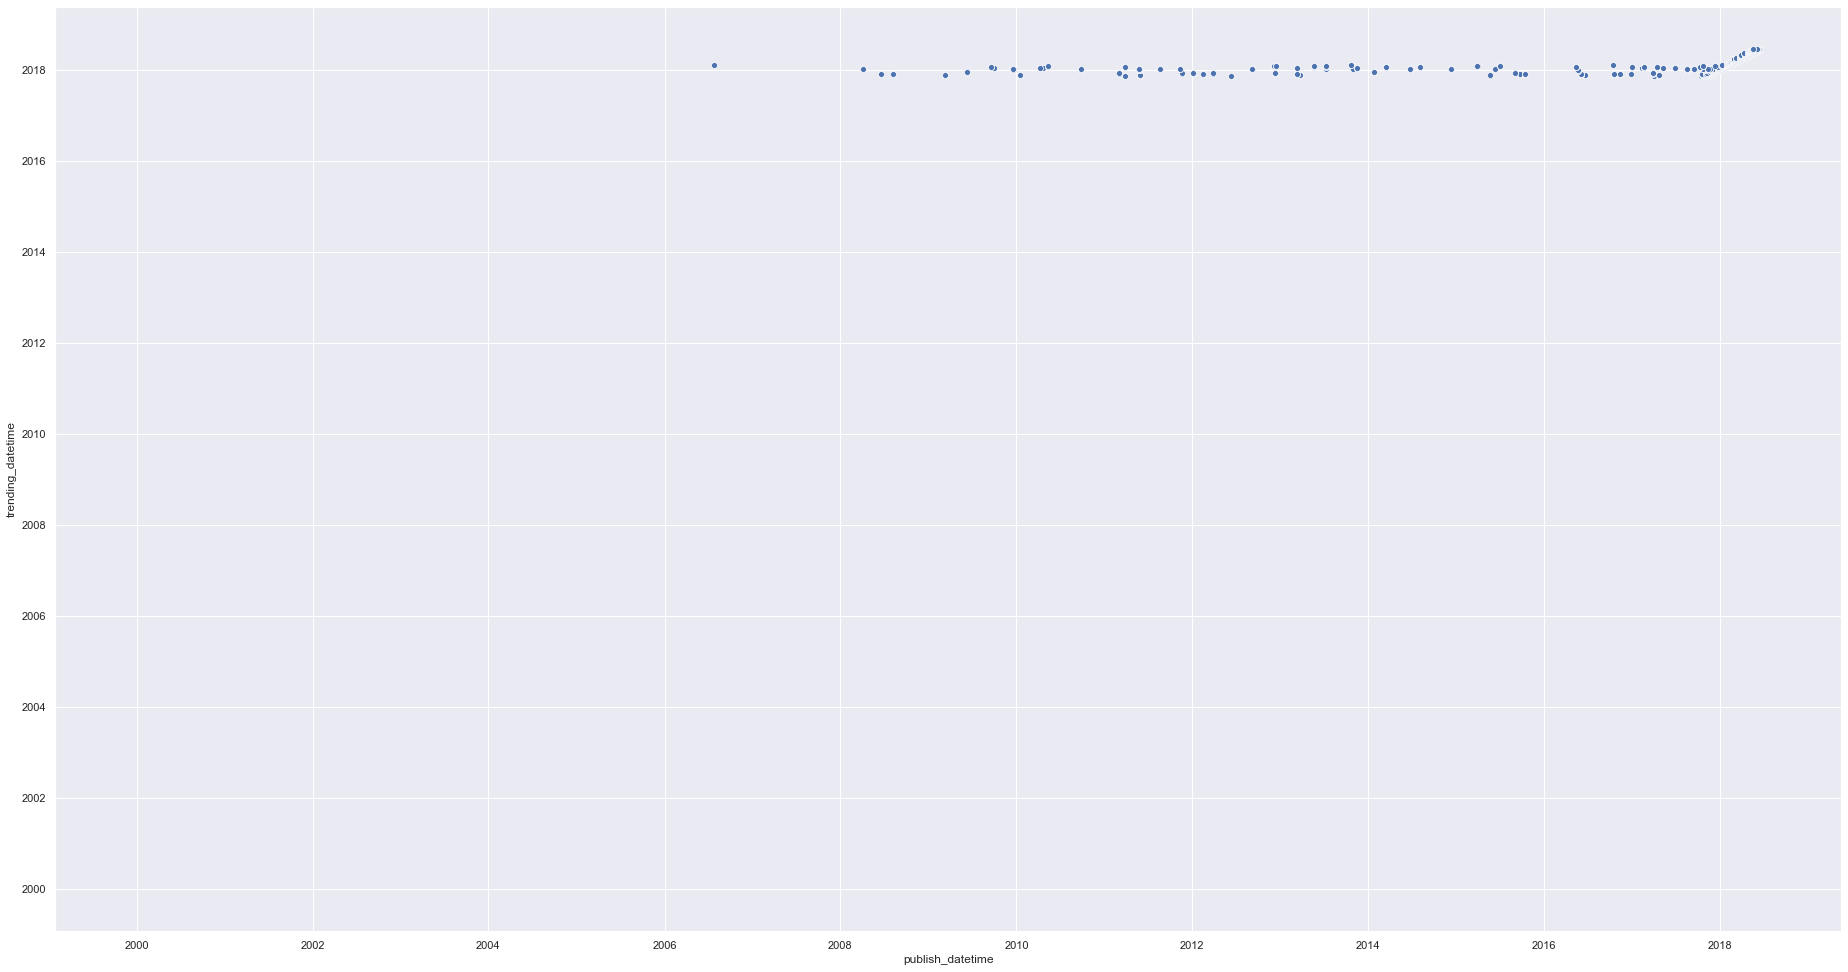

In [32]:
"""Vertical version of the graph below"""
# sns.scatterplot(x='trending_datetime', y='publish_datetime', data=US_trending_all)

sns.scatterplot(x='publish_datetime', y='trending_datetime', data=US_trending_all)

In [40]:
plt.xlim([publish_datetime.date(2012, 1, 26), publish_datetime.date(2018, 12, 31)])
sns.scatterplot(x='publish_datetime', y='trending_datetime', data=US_trending_all)

NameError: name 'publish_datetime' is not defined

In [54]:
US_trending_all.groupby(['newtrending_date']).size().reset_index(name='counts')

,newtrending_date,counts
0,2017-11-14,197
1,2017-11-15,198
2,2017-11-16,198
3,2017-11-17,197
4,2017-11-18,197
...,...,...
200,2018-06-10,199
201,2018-06-11,199
202,2018-06-12,199
203,2018-06-13,199
